In [1]:
import numpy as np
from scipy import stats
from statsmodels.stats import weightstats
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.set_option('max_rows', 5)
%matplotlib inline

# ÂØæÂøú„ÅÆ„Å™„ÅÑ2Áæ§„ÅÆÊ§úÂÆö

## ÂØæÂøú„ÅÆ„Å™„ÅÑ2Áæ§„ÅÆÂπ≥Âùá„ÅÆÂ∑Æ„ÅÆÊ§úÂÆö
---
ÂØæÂøú„ÅÆ„Å™„ÅÑ 2 Áæ§„ÅÆ„Éá„Éº„Çø $X,Y$ „Åß„ÄÅ„Åù„Çå„Åû„Çå„ÅÆÂπ≥Âùá $\overline{X},\overline{Y}$ „ÅÆÂ∑Æ„Å´ÂØæ„Åó„Å¶ $t$ Ê§úÂÆö„ÇíË°å„ÅÜ„ÄÇ

ÊØçÈõÜÂõ£ÂàÜÂ∏É„ÅåÂÖ±„Å´Ê≠£Ë¶èÂàÜÂ∏É„Å´Âæì„ÅÜ„ÄÅ„Åæ„Åü„ÅØ„Çµ„É≥„Éó„É´„Çµ„Ç§„Ç∫„ÅåÂ§ß„Åç„Åè $\overline{X},\overline{Y}$ „ÅÆ„Å©„Å°„Çâ„Å´„ÇÇ[‰∏≠ÂøÉÊ•µÈôêÂÆöÁêÜ](../beginner/population_mean_estimation.ipynb#%E4%B8%AD%E5%BF%83%E6%A5%B5%E9%99%90%E5%AE%9A%E7%90%86-(central-limit-theorem))„ÅåÊàê„ÇäÁ´ã„Å§„Çà„ÅÜ„Å™Â†¥Âêà„Å´„ÅØ„ÄÅÂ§âÊï∞„Åù„Çå„Åû„Çå„ÅÆÂπ≥Âùá„ÅÆÂ∑Æ„Å´ÂØæ„Åó„Å¶ $t$ Ê§úÂÆö„Çí‰ΩøÁî®„Åô„Çã„ÄÇ„Åü„Å†„Åó„ÄÅËá™Áî±Â∫¶„ÅÆË®àÁÆó„Åå„Åì„Çå„Åæ„Åß„Å®Áï∞„Å™„Çã„ÄÇ

<table class="border">
    <tr>
        <th class="border-bottom border-right-bold">ÂØæÂøú„ÅÆ„ÅÇ„Çã 2 Áæ§</th>
        <td>„Äå2 Áæ§„ÅÆÂ∑Æ„Äç„ÅÆÂπ≥Âùá„Å´ÂØæ„Åó„Å¶ $t$ Ê§úÂÆö</td>
    </tr>
    <tr>
        <th class="border-bottom border-right-bold">ÂØæÂøú„ÅÆ„Å™„ÅÑ 2 Áæ§</th>
        <td>„Äå2 Áæ§„ÅÆÂπ≥Âùá„Äç„ÅÆÂ∑Æ„Å´ÂØæ„Åó„Å¶ $t$ Ê§úÂÆö</td>
    </tr>
</table>

„Åì„Åì„Åß„ÅØ 2 Ê®ôÊú¨„Å´„Å§„ÅÑ„Å¶‰ª•‰∏ã„ÅÆ„Çà„ÅÜ„Å´ÂÆöÁæ©„Åô„Çã„ÄÇ

<table class="border text-center">
    <tr class="background-dark">
        <th></th>
        <th>ÊØçÂπ≥Âùá</th>
        <th>ÊØçÂàÜÊï£</th>
        <th>Ê®ôÊú¨</th>
        <th>„Çµ„É≥„Éó„É´„Çµ„Ç§„Ç∫</th>
        <th>Ê®ôÊú¨Âπ≥Âùá</th>
    </tr>
    <tr class="background-bright">
        <th class="border-bottom background-dark">ÊØçÈõÜÂõ£ $1$</th>
        <td>$\mu _{X}$</td>
        <td>$\sigma ^{2}_{X}$</td>
        <td>$X$</td>
        <td>$n_{X}$</td>
        <td style="min-width: 11em;">${\displaystyle \overline{X}\sim \mathcal{N}\left(\mu _{X},\ \frac
            {\sigma ^{2}_{X}}
            {n_{X}}
        \right)}$</td>
    </tr>
    <tr class="background-bright">
        <th class="border-bottom background-dark">ÊØçÈõÜÂõ£ $2$</th>
        <td>$\mu _{Y}$</td>
        <td>$\sigma ^{2}_{Y}$</td>
        <td>$Y$</td>
        <td>$n_{Y}$</td>
        <td style="min-width: 11em;">${\displaystyle \overline{Y}\sim \mathcal{N}\left(\mu _{Y},\ \frac
            {\sigma ^{2}_{Y}}
            {n_{Y}}
        \right)}$</td>
    </tr>
</table>

### Á≠âÂàÜÊï£„ÅÆÂ†¥Âêà
---
2 Áæ§ $(X,Y)$ „ÅÆÂàÜÊï£„ÅåÁ≠â„Åó„ÅÑ $\sigma ^{2}_{X} =\sigma ^{2}_{Y}$ Â†¥Âêà„ÄÅ 2 Áæ§„ÅÆÂπ≥Âùá„ÅÆÂ∑Æ $D=\overline{X}-\overline{Y}$ „ÅÆÂàÜÊï£„ÅØ
$
\displaystyle \frac
    {\sigma ^{2}_{X}}
    {n_{X}}
+\frac
    {\sigma ^{2}_{Y}}
    {n_{Y}}
=\left(\frac
    {1}
    {n_{X}}
+\frac
    {1}
    {n_{Y}}
\right) \sigma ^{2}
$
„Åß„ÅÇ„Çä„ÄÅ„Åù„ÅÆÊé®ÂÆöÈáè„ÅØ„Åù„Çå„Åû„Çå„ÅÆ‰∏çÂÅèÊé®ÂÆöÈáè„ÅÆÂä†ÈáçÂπ≥Âùá

$
\begin{align}
    s^{2}_{D} & =\frac
        {( n_{X} -1) s_{X} +( n_{Y} -1) s_{Y}}
        {( n_{X} -1) +( n_{Y} -1)}\\
     & \\
     & =\frac
         {( n_{X} -1){\displaystyle \frac
             {{\displaystyle \sum ^{n_{X}}_{i=1}\left( X_{i} -\overline{X}\right) ^{2}}}
             {n_{X} -1}
         +( n_{Y} -1){\displaystyle \frac
             {{\displaystyle \sum ^{n_{Y}}_{i=1}\left( Y_{i} -\overline{Y}\right) ^{2}}}
             {n_{Y} -1}
         }}}
         {n_{X} +n_{Y} -2}\\
     & \\
     & =\frac
         {{\displaystyle \sum ^{n_{X}}_{i=1}\left( X_{i} -\overline{X}\right) ^{2}+\sum ^{n_{Y}}_{i=1}\left( Y_{i} -\overline{Y}\right) ^{2}}}
         {n_{X} +n_{Y} -2}
\end{align}
$

„ÅßË°®„Åï„Çå„Çã„ÄÇ („Éó„Éº„É´„Åó„ÅüÂàÜÊï£)

„Åì„Çå„Çâ„ÇíÁî®„ÅÑ„Å¶„ÄÅ‰ª•‰∏ã„ÅÆÁµ±Ë®àÈáè $t$ „ÅåËá™Áî±Â∫¶ $n_{X}+n_{Y}-2$ „ÅÆ $t$ ÂàÜÂ∏É„Å´Âæì„ÅÜ„Åì„Å®„ÇíÂà©Áî®„Åó„Å¶Ê§úÂÆö„Åô„Çã„ÄÇ

$
\begin{align}
    t & =\frac
        {\overline{D} -\mu _{D}}
        {\sqrt{
            \displaystyle \left(\frac
                {1}
                {n_{X}}
            +\frac
                {1}
                {n_{Y}}
            \right) s^{2}_{D}
        }}\\
     & \\
     & =\frac
         {\overline{X} -\overline{Y} -\mu _{D}}
         {s_{D}\sqrt{
             \displaystyle \left(\frac
                 {1}
                 {n_{X}}
             +\frac
                 {1}
                 {n_{Y}}
             \right)
         }}
\end{align}
$

Á∑¥ÁøíÂïèÈ°å

---
‰ª•‰∏ã„ÅÆ„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆ`A`„Ç∞„É´„Éº„Éó„Å®`B`„Ç∞„É´„Éº„Éó„ÅÆÂπ≥Âùá„Å´Â∑Æ„Åå„ÅÇ„Çã„Åã„ÇíÊ§úÂÆö„Åô„Çã„Åü„ÇÅ„ÅÆÁµ±Ë®àÈáè $t$ „ÇíÊ±Ç„ÇÅ„Çã„ÄÇ‰∏°„Ç∞„É´„Éº„Éó„ÅÆÂàÜÊï£„ÅØÁ≠â„Åó„ÅÑ„Å®‰ªÆÂÆö„Åó„Å¶ËâØ„ÅÑ„ÄÇ

In [2]:
np.random.seed(1234)
A = pd.DataFrame(dict(score=np.random.normal(50, 5, size=50), group=['A'] * 50),
                 dtype=int)
B = pd.DataFrame(dict(score=np.random.normal(51, 5, size=40), group=['B'] * 40),
                 dtype=int)
data = pd.concat([A, B]).sample(frac=1).reset_index(drop=True)
print('data')
display(data)

data


score group
0   47.072824     B
1   49.316026     A
..        ...   ...
88  48.986768     A
89  50.010592     A

[90 rows x 2 columns]

Ëß£Á≠î‰æã

---

In [3]:
A = data.query('group == "A"')['score']
B = data.query('group == "B"')['score']
na = A.count()
nb = B.count()
mua = A.mean()
mub = B.mean()
sd = np.sqrt((((A - mua)**2).sum() + ((B - mub)**2).sum()) / (na + nb - 2))
t = (mua - mub) / (sd * np.sqrt(1 / na + 1 / nb))
t

-0.8396879421853141

---

Á∑¥ÁøíÂïèÈ°å

---
„Åì„ÅÆÊ§úÂÆö„Å´ÂØæÂøú„Åô„ÇãÂ∏∞ÁÑ°ÂàÜÂ∏É„ÅÆÁ¢∫ÁéáÂØÜÂ∫¶Èñ¢Êï∞„Å®„ÄÅ‰∏ä„ÅßÊ±Ç„ÇÅ„Åü $t$ Áµ±Ë®àÈáè„ÅÆ‰ΩçÁΩÆ„Çí„Ç∞„É©„ÉïË°®Á§∫„Åô„Çã„ÄÇ

Ëß£Á≠î‰æã

---

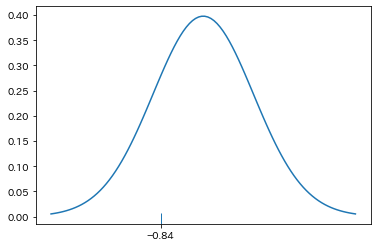

In [4]:
x = np.linspace(-3, 3, 100)
null_dist = stats.t(na + nb - 2)
plt.plot(x, null_dist.pdf(x))
sns.rugplot([t])
plt.xticks([t])
plt.show()

---

Á∑¥ÁøíÂïèÈ°å

---
‰∏ä„ÅßÊ±Ç„ÇÅ„ÅüÊ§úÂÆöÁµ±Ë®àÈáè $ùë°$ „Å´ÂØæÂøú„Åó„Åü $ùëù$ ÂÄ§„ÇíÊ±Ç„ÇÅ„Çã„ÄÇ

Ëß£Á≠î‰æã

---

In [5]:
p = null_dist.sf(np.abs(t)) * 2
p

0.4033588329742739

---

### ‰∏çÁ≠âÂàÜÊï£„ÅÆÂ†¥Âêà
---
2 Áæ§„ÅÆÂπ≥Âùá„ÅÆÂ∑Æ $
\displaystyle D=\overline{X} -\overline{Y} \sim \mathcal{N}\left( \mu _{X} -\mu _{Y} ,\frac
    {\sigma ^{2}_{X}}
    {n_{X}}
+\frac
    {\sigma ^{2}_{Y}}
    {n_{Y}}
\right)
$ „Å™„ÅÆ„ÅßÊ§úÂÆöÁµ±Ë®àÈáè $t$ „ÅØ

$
\begin{align}
    t & =\frac
        {\left(\overline{X} -\overline{Y}\right) -( \mu _{X} -\mu _{Y})}
        {s_{D}}\\
     & \\
     & =\frac
         {\left(\overline{X} -\overline{Y}\right) -( \mu _{X} -\mu _{Y})}
         {\sqrt{
             \displaystyle \frac
                 {s^{2}_{X}}
                 {n_{X}}
             +\frac
                 {s^{2}_{Y}}
                 {n_{Y}}
         }}
\end{align}
$

„Åì„ÅÆ $t$ „ÅØËá™Áî±Â∫¶ $
\displaystyle \nu =\frac
    {\left(\displaystyle \frac
        {s^{2}_{X}}
        {n_{X}}
    +\frac
        {s^{2}_{Y}}
        {n_{Y}}
    \right)^{2}}
    {\displaystyle \frac
        {1}
        {n_{X} -1}
    \left(\frac
        {s^{2}_{X}}
        {n_{X}}
    \right)^{2} +\frac
        {1}
        {n_{Y} -1}
    \left(\frac
        {s^{2}_{Y}}
        {n_{Y}}
    \right)^{2}}
$ „ÅÆ $t$ ÂàÜÂ∏É„Å´Ëøë‰ººÁöÑ„Å´Âæì„ÅÜ„Åì„Å®„Åå„Çè„Åã„Å£„Å¶„ÅÑ„Çã„ÅÆ„Åß„ÄÅ„Åì„Çå„ÇíÂà©Áî®„Åó„Å¶Ê§úÂÆö„Åô„Çã„ÄÇ („Ç¶„Çß„É´„ÉÅ„ÅÆ $t$ Ê§úÂÆö)

Á∑¥ÁøíÂïèÈ°å

---
‰ª•‰∏ã„ÅÆ„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆ`A`„Ç∞„É´„Éº„Éó„Å®`B`„Ç∞„É´„Éº„Éó„ÅÆÂπ≥Âùá„Å´Â∑Æ„Åå„ÅÇ„Çã„Åã„ÇíÊ§úÂÆö„Åô„Çã„Åü„ÇÅ„ÅÆÁµ±Ë®àÈáè $t$ „ÇíÊ±Ç„ÇÅ„Çã„ÄÇ‰∏°„Ç∞„É´„Éº„Éó„ÅÆÂàÜÊï£„ÅØÁ≠â„Åó„Åè„Å™„ÅÑ„ÇÇ„ÅÆ„Å®‰ªÆÂÆö„Åô„Çã„ÄÇ

In [6]:
print('data')
display(data)

data


score group
0   47.072824     B
1   49.316026     A
..        ...   ...
88  48.986768     A
89  50.010592     A

[90 rows x 2 columns]

Ëß£Á≠î‰æã

---

In [7]:
A = data.query('group == "A"')['score']
B = data.query('group == "B"')['score']
sx2 = A.var(ddof=1) / A.count()
sy2 = B.var(ddof=1) / B.count()
t = (A.mean() - B.mean()) / np.sqrt(sx2 + sy2)
t

-0.8270628321291595

---

Á∑¥ÁøíÂïèÈ°å

---
„Åì„ÅÆÊ§úÂÆö„Å´ÂØæÂøú„Åô„ÇãÂ∏∞ÁÑ°ÂàÜÂ∏É„ÅÆÁ¢∫ÁéáÂØÜÂ∫¶Èñ¢Êï∞„Å®„ÄÅ‰∏ä„ÅßÊ±Ç„ÇÅ„Åü $t$ Áµ±Ë®àÈáè„ÅÆ‰ΩçÁΩÆ„Çí„Ç∞„É©„ÉïË°®Á§∫„Åô„Çã„ÄÇ

Ëß£Á≠î‰æã

---

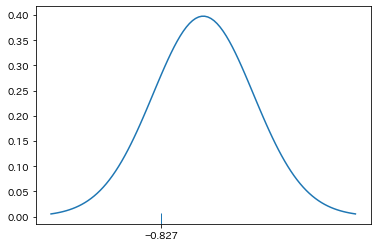

In [8]:
x = np.linspace(-3, 3, 100)
nu = (sx2 + sy2)**2 / (sx2**2 / (A.count() - 1) + sy2**2 / (B.count() - 1))
null_dist = stats.t(nu)
plt.plot(x, null_dist.pdf(x))
sns.rugplot([t])
plt.xticks([t])
plt.show()

---

Á∑¥ÁøíÂïèÈ°å

---
‰∏ä„ÅßÊ±Ç„ÇÅ„ÅüÊ§úÂÆöÁµ±Ë®àÈáè $ùë°$ „Å´ÂØæÂøú„Åó„Åü $ùëù$ ÂÄ§„ÇíÊ±Ç„ÇÅ„Çã„ÄÇ

Ëß£Á≠î‰æã

---

In [9]:
p = null_dist.sf(np.abs(t)) * 2
p

0.4107247758044176

---

## Python„Åß„ÅÆÂØæÂøú„ÅÆ„Å™„ÅÑ2Áæ§„ÅÆÂπ≥Âùá„ÅÆÂ∑Æ„ÅÆÊ§úÂÆö„ÅÆÂÆüË°åÊñπÊ≥ï
---

### Á≠âÂàÜÊï£„ÅÆÂ†¥Âêà
---
`scipy.stats.ttest_ind`„Åæ„Åü„ÅØ`statsmodels.stats.weightstats.ttest_ind`„Çí‰ΩøÁî®„Åô„Çã„ÄÇ

In [10]:
help(stats.ttest_ind)

Help on function ttest_ind in module scipy.stats.stats:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which does not assume equal
        population variance [2]_.
    
   

In [11]:
stats.ttest_ind(
    data.query('group == "A"')['score'],
    data.query('group == "B"')['score'])

Ttest_indResult(statistic=-0.8396879421853143, pvalue=0.4033588329742739)

In [12]:
help(weightstats.ttest_ind)

Help on function ttest_ind in module statsmodels.stats.weightstats:

ttest_ind(x1, x2, alternative='two-sided', usevar='pooled', weights=(None, None), value=0)
    ttest independent sample
    
    Convenience function that uses the classes and throws away the intermediate
    results,
    compared to scipy stats: drops axis option, adds alternative, usevar, and
    weights option.
    
    Parameters
    ----------
    x1 : array_like, 1-D or 2-D
        first of the two independent samples, see notes for 2-D case
    x2 : array_like, 1-D or 2-D
        second of the two independent samples, see notes for 2-D case
    alternative : str
        The alternative hypothesis, H1, has to be one of the following
    
           * 'two-sided' (default): H1: difference in means not equal to value
           * 'larger' :   H1: difference in means larger than value
           * 'smaller' :  H1: difference in means smaller than value
    
    usevar : str, 'pooled' or 'unequal'
        If ``poole

In [13]:
weightstats.ttest_ind(
    data.query('group == "A"')['score'],
    data.query('group == "B"')['score'])

(-0.8396879421853077, 0.40335883297427755, 88.0)

### ‰∏çÁ≠âÂàÜÊï£„ÅÆÂ†¥Âêà
---
Á≠âÂàÜÊï£„ÅÆÂ†¥Âêà„Å®Âêå„Åò„Åè`scipy.stats.ttest_ind`„Åæ„Åü„ÅØ`statsmodels.stats.weightstats.ttest_ind`„Çí‰ΩøÁî®„Åó„ÄÅ`equal_var=False`„ÇÑ`usevar="unequal"`„Å´„Åô„Çã„ÄÇ

In [14]:
help(stats.ttest_ind)

Help on function ttest_ind in module scipy.stats.stats:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which does not assume equal
        population variance [2]_.
    
   

In [15]:
stats.ttest_ind(data.query('group == "A"')['score'],
                data.query('group == "B"')['score'],
                equal_var=False)

Ttest_indResult(statistic=-0.8270628321291595, pvalue=0.4107247758044176)

In [16]:
help(weightstats.ttest_ind)

Help on function ttest_ind in module statsmodels.stats.weightstats:

ttest_ind(x1, x2, alternative='two-sided', usevar='pooled', weights=(None, None), value=0)
    ttest independent sample
    
    Convenience function that uses the classes and throws away the intermediate
    results,
    compared to scipy stats: drops axis option, adds alternative, usevar, and
    weights option.
    
    Parameters
    ----------
    x1 : array_like, 1-D or 2-D
        first of the two independent samples, see notes for 2-D case
    x2 : array_like, 1-D or 2-D
        second of the two independent samples, see notes for 2-D case
    alternative : str
        The alternative hypothesis, H1, has to be one of the following
    
           * 'two-sided' (default): H1: difference in means not equal to value
           * 'larger' :   H1: difference in means larger than value
           * 'smaller' :  H1: difference in means smaller than value
    
    usevar : str, 'pooled' or 'unequal'
        If ``poole

In [17]:
weightstats.ttest_ind(data.query('group == "A"')['score'],
                      data.query('group == "B"')['score'],
                      usevar='unequal')

(-0.8270628321291532, 0.41072477580442124, 77.99187789833141)

## Ê≥®ÊÑèÁÇπ

### Á≠âÂàÜÊï£ÊÄß„ÅÆÂà§Êñ≠
---
ÂØæÂøú„ÅÆ„Å™„ÅÑ 2 Áæ§„ÅÆ $t$ Ê§úÂÆö (Á≠âÂàÜÊï£) „Åã„Ç¶„Çß„É´„ÉÅ„ÅÆ $t$ Ê§úÂÆö (‰∏çÁ≠âÂàÜÊï£) „ÅÆ„Å©„Å°„Çâ„Çí‰ΩøÁî®„Åô„Çã„ÅãÂà§Êñ≠„Åô„Çã„Åü„ÇÅ„Å´Á≠âÂàÜÊï£ÊÄß„ÅÆÊ§úÂÆö ($F$ Ê§úÂÆö) „ÇíÂÆüÊñΩ„Åô„Çã„Åì„Å®„Åå„ÅÇ„Çã„ÄÇ („Çµ„É≥„Éó„É´„Çµ„Ç§„Ç∫„ÅåÂ∞è„Åï„Åè‰∏≠ÂøÉÊ•µÈôêÂÆöÁêÜ„ÅåÂà©Áî®„Åß„Åç„Å™„ÅÑÂ†¥Âêà„Å´„ÅØ $F$ Ê§úÂÆö„ÅÆÂâç„Å´Ê≠£Ë¶èÂàÜÂ∏É„Åã„Å©„ÅÜ„Åã„ÅÆÊ§úÂÆö„ÇíÂÆüÊñΩ„Åó„Å¶„ÅÑ„ÇãÂ†¥Âêà„ÇÇ„ÅÇ„Çã)  
„Åì„Çå„Å´„ÅØ‰ª•‰∏ã„ÅÆÂïèÈ°å„Åå„ÅÇ„Çã„ÄÇ

#### $F$ Ê§úÂÆö„ÅÆÁµêÊûú„ÅÆËß£Èáà
---
$F$ Ê§úÂÆö„ÅØÁ≠âÂàÜÊï£„ÇíÂ∏∞ÁÑ°‰ªÆË™¨„Å®„Åó„Å¶„ÄÅÂØæÁ´ã‰ªÆË™¨„Åß„ÅÇ„Çã‰∏çÁ≠âÂàÜÊï£„Åã„Å©„ÅÜ„Åã„ÇíÂà§Êñ≠„Åô„Çã„ÇÇ„ÅÆ„Å†„Åå„ÄÅ[Ê§úÂÆöÁµêÊûú„ÅÆËß£Èáà](hypothesis_testing.ipynb#%E7%B5%90%E8%AB%96%E3%81%AE%E6%84%8F%E5%91%B3)„Å®„Åó„Å¶„ÅØÂ∏∞ÁÑ°‰ªÆË™¨„ÇíÊ£ÑÂç¥„Åó„ÅüÂ†¥Âêà„Å´‰∏çÁ≠âÂàÜÊï£„Åß„ÅÇ„Çã„ÅÆ„ÅåÁ¢∫„Åã„Çâ„Åó„ÅÑ„Åì„Å®„ÅØ‰∏ªÂºµ„Åß„Åç„Çã„Åå„ÄÅÂ∏∞ÁÑ°‰ªÆË™¨„ÅåÊé°Êäû„Åï„Çå„Åü„Åã„Çâ„Å®„ÅÑ„Å£„Å¶Á≠âÂàÜÊï£„Åß„ÅÇ„Çã„Åì„Å®„ÇíÁ©çÊ•µÁöÑ„Å´„ÅØ‰∏ªÂºµ„Åß„Åç„Å™„ÅÑ„ÄÇ„Åó„Åü„Åå„Å£„Å¶„ÄÅ $F$ Ê§úÂÆö„ÅÆÁµêÊûú„Çí„ÇÇ„Å£„Å¶ÂØæÂøú„ÅÆ„Å™„ÅÑ 2 Áæ§„ÅÆ $t$ Ê§úÂÆö„Çí‰ΩøÁî®„Åô„Çã„Å®Âà§Êñ≠„Åô„Çã„Åì„Å®„Å´„ÅØÂïèÈ°å„Åå„ÅÇ„Çã„ÄÇ

####  Ê§úÂÆö„ÅÆÂ§öÈáçÊÄß
---
Ë§áÊï∞„ÅÆÊ§úÂÆö„Çí‰ΩµÁî®„Åó„ÅüÂ†¥Âêà„ÄÅÊ§úÂÆö„ÅÆÂ§öÈáçÊÄß„Å®„ÅÑ„ÅÜÂ∏∞ÁÑ°‰ªÆË™¨„ÅåÊ≠£„Åó„ÅÑ„ÅÆ„Å´Ê£ÑÂç¥„Åó„Å¶„Åó„Åæ„ÅÜÁ¨¨‰∏ÄÁ®Æ„ÅÆË™§„Çä„ÅÆÂèØËÉΩÊÄß„ÅåÈ´ò„Åè„Å™„ÇãÂïèÈ°å„ÅåÁîü„Åò„Çã„ÄÇ‰æã„Åà„Å∞ÊúâÊÑèÊ∞¥Ê∫ñ $\alpha =0.05$ „Åß 2 ÂõûÊ§úÂÆö„Åô„Çã„Å® $1-0.95^{2} \fallingdotseq 0.098$ „ÄÅ 3 ÂõûÊ§úÂÆö„Åô„Çã„Å® $1-0.95^{3} \fallingdotseq 0.143$ „Å®Á¨¨‰∏ÄÁ®Æ„ÅÆË™§„Çä„ÅÆÂèØËÉΩÊÄß„ÅØ‰∏äÊòá„Åó„Å¶„ÅÑ„Åè„ÄÇ

### Â∏∏„Å´‰∏çÁ≠âÂàÜÊï£„ÇíÂâçÊèê„Å®„Åô„Çã„Åì„Å®„ÅÆÂïèÈ°å
---
‰∏äË®ò„ÅÆÂïèÈ°å„Åå„ÅÇ„Çã„Åü„ÇÅ„ÄÅÂØæÂøú„ÅÆ„Å™„ÅÑ 2 Áæ§„ÅÆÂπ≥Âùá„ÅÆÂ∑Æ„ÅÆÊ§úÂÆö„Åß„ÅØÂ∏∏„Å´„Ç¶„Çß„É´„ÉÅ„ÅÆÊ§úÂÆö„Çí‰Ωø„ÅÜ„Åπ„Åç„Å®„ÅÑ„ÅÜÁ´ãÂ†¥„ÇÇÊúâÂäõ„Åß„ÅÇ„Çã„ÄÇ  
„Åó„Åã„Åó„ÄÅ„Ç¶„Çß„É´„ÉÅ„ÅÆÊ§úÂÆö„ÅØËá™Áî±Â∫¶„ÇíËøë‰ºº„Åó„Å¶„ÅÑ„Çã„ÅÆ„Åß„ÄÅÂÆüÈöõ„Å´Á≠âÂàÜÊï£„ÅÆÂ†¥Âêà„Å´„ÅØÂØæÂøú„ÅÆ„Å™„ÅÑ 2 Áæ§„ÅÆ $t$ Ê§úÂÆö„Çà„ÇäÁµêÊûú„Åå‰∏çÊ≠£Á¢∫„Å´„Å™„Çã„ÄÇ

## ÂØæÂøú„ÅÆ„Å™„ÅÑ2Áæ§„ÅÆÊØîÁéá„ÅÆÂ∑Æ„ÅÆÊ§úÂÆö
---
[ÊØçÊØîÁéá„ÅÆÊ§úÂÆö](z_test.ipynb)„Å®ÂêåÊßò„Å´„ÄÅÊ®ôÊú¨ÂàÜÂ∏É„Åå‰∫åÈ†ÖÂàÜÂ∏É„Åß**ÊúüÂæÖÂÄ§ $np$ („Åä„Çà„Å≥ÂàÜÊï£ $np(1-p)$) „ÅåÂ§ß„Åç„ÅÑ„Å®„Åç**„Å´„ÅØ[Ê≠£Ë¶èÂàÜÂ∏É $\mathcal{N}(np,np(1-p))$ „ÅßËøë‰ºº„Åß„Åç„Çã](../beginner/distribution.ipynb#%E7%A2%BA%E7%8E%87%E5%88%86%E5%B8%83%E3%81%BE%E3%81%A8%E3%82%81)„Åì„Å®„ÇíÂà©Áî®„Åó„Å¶Ê§úÂÆö„Åô„Çã„ÄÇ

2 Ê®ôÊú¨„Å´„Å§„ÅÑ„Å¶‰ª•‰∏ã„ÅÆ„Çà„ÅÜ„Å´ÂÆöÁæ©„Åô„Çã„ÄÇ

<table class="border text-center">
    <tr class="background-dark">
        <th></th>
        <th>ÊØçÊØîÁéá</th>
        <th>Ê®ôÊú¨ÊØîÁéá</th>
        <th>„Çµ„É≥„Éó„É´„Çµ„Ç§„Ç∫</th>
        <th>Ê®ôÊú¨ÊØîÁéá„ÅÆÊé®ÂÆöÈáè</th>
    </tr>
    <tr class="background-bright">
        <th class="border-bottom background-dark">ÊØçÈõÜÂõ£ $1$</th>
        <td>$\mu _{X}$</td>
        <td>$p_{X}$</td>
        <td>$n_{X}$</td>
        <td style="min-width: 13.5em;">$\overline{X}\sim \mathcal{N}(p_{X},\ p_{X}(1-p_{X}))$</td>
    </tr>
    <tr class="background-bright">
        <th class="border-bottom background-dark">ÊØçÈõÜÂõ£ $2$</th>
        <td>$\mu _{Y}$</td>
        <td>$p_{Y}$</td>
        <td>$n_{Y}$</td>
        <td style="min-width: 13.5em;">$\overline{Y}\sim \mathcal{N}(p_{Y},\ p_{Y}(1-p_{Y}))$</td>
    </tr>
</table>

2 Áæ§„ÅÆÊØîÁéá„ÅÆÂ∑Æ $D=\overline{X} -\overline{Y}$ „ÅÆÂàÜÊï£„ÅÆÊé®ÂÆöÈáè„ÅØ„Éó„Éº„É´„Åï„Çå„ÅüÊ®ôÊú¨ÊØîÁéá $\displaystyle \hat{p} =\frac{n_{X} p_{X} +n_{Y} p_{Y}}{n_{X} +n_{Y}}$ „Çí‰Ωø„Å£„Å¶„ÄÅ‰ª•‰∏ã„ÅÆ„Çà„ÅÜ„Å´Ë°®„Åï„Çå„Çã„ÄÇ

$
\begin{align}
    \sigma ^{2}_{D} & =\frac
        {\hat{p}\left( 1-\hat{p}\right)}
        {n_{X}}
    +\frac
        {\hat{p}\left( 1-\hat{p}\right)}
        {n_{Y}}\\
     & \\
     & =\hat{p}\left( 1-\hat{p}\right)\left(\frac
         {1}
         {n_{X}}
     +\frac
         {1}
         {n_{Y}}
     \right)
\end{align}
$

„Åù„Åì„Åß„ÄÅ‰ª•‰∏ã„ÅÆÁµ±Ë®àÈáè $z$ „ÅåÊ®ôÊ∫ñÊ≠£Ë¶èÂàÜÂ∏É„Å´Âæì„ÅÜ„Åì„Å®„ÇíÂà©Áî®„Åó„Å¶Ê§úÂÆö„Åô„Çã„ÄÇ (Â∏∞ÁÑ°‰ªÆË™¨„ÅØ $\mu _{X}=\mu _{Y}$)

$
\begin{align}
    z & =\frac
        {\overline{D} -\mu _{D}}
        {\sigma _{D}}\\
     & \\
     & =\frac
         {( p_{X} -p_{Y}) -( \mu _{X} -\mu _{Y})}
         {\sqrt{
             \hat{p}\left( 1-\hat{p}\right)\left(\frac
                 {1}
                 {n_{X}}
             +\frac
                 {1}
                 {n_{Y}}
             \right)
         }}\\
     & \\
     & =\frac
         {p_{X} -p_{Y}}
         {\sqrt{
             \hat{p}\left( 1-\hat{p}\right)\left(\frac
                 {1}
                 {n_{X}}
             +\frac
                 {1}
                 {n_{Y}}
             \right)
         }}
\end{align}
$

„Éó„Éº„É´„Åï„Çå„ÅüÊ®ôÊú¨ÊØîÁéá„Çí‰Ωø„Çè„Åö„ÄÅ $
\displaystyle z=\frac
    {p_{X} -p_{Y}}
    {\sqrt{
        \displaystyle \frac
            {p_{X}( 1-p_{X})}
            {n_{X}}
        +\frac
            {p_{Y}( 1-p_{Y})}
            {n_{Y}}
    }}
$ „ÇíÂà©Áî®„Åó„Å¶„ÇÇ„Çà„ÅÑ„ÄÇ

Á∑¥ÁøíÂïèÈ°å

---
Êù±‰∫¨„Å®Â§ßÈò™„ÅÆË¶ñËÅ¥Áéá„ÇíË™øÊüª„Åó„Åü‰ª•‰∏ã„ÅÆ„Éá„Éº„Çø„Çª„ÉÉ„Éà`ratings`„Åß„ÄÅÊØçÊØîÁéá„Å´Â∑Æ„Åå„ÅÇ„Çã„Åã„Å©„ÅÜ„Åã„ÇíÊ§úÂÆö„Åô„Çã„Åü„ÇÅ„ÅÆÁµ±Ë®àÈáè $z$ „ÇíÊ±Ç„ÇÅ„Çã„ÄÇ

In [18]:
np.random.seed(1234)
tokyo = stats.bernoulli.rvs(0.08, size=400)
osaka = stats.bernoulli.rvs(0.12, size=200)
ratings = pd.DataFrame(
    dict(view=np.hstack([tokyo, osaka]),
         region=['Êù±‰∫¨'] * tokyo.size + ['Â§ßÈò™'] * osaka.size))
print('ratings')
display(ratings)

ratings


view region
0       0     Êù±‰∫¨
1       0     Êù±‰∫¨
..    ...    ...
598     0     Â§ßÈò™
599     0     Â§ßÈò™

[600 rows x 2 columns]

Ëß£Á≠î‰æã

---

In [19]:
tokyo = ratings.query('region == "Êù±‰∫¨"')['view']
osaka = ratings.query('region == "Â§ßÈò™"')['view']
p_t = tokyo.mean()
p_o = osaka.mean()
n_t = tokyo.count()
n_o = osaka.count()
p_hat = (n_t * p_t + n_o * p_o) / (n_t + n_o)
z = (p_t - p_o) / np.sqrt(p_hat * (1 - p_hat) * (1 / n_t + 1 / n_o))
z

-1.6950234656435301

---

Á∑¥ÁøíÂïèÈ°å

---
„Åì„ÅÆÊ§úÂÆö„Å´ÂØæÂøú„Åô„ÇãÂ∏∞ÁÑ°ÂàÜÂ∏É„ÅÆÁ¢∫ÁéáÂØÜÂ∫¶Èñ¢Êï∞„Å®„ÄÅ‰∏ä„ÅßÊ±Ç„ÇÅ„Åü $z$ Áµ±Ë®àÈáè„ÅÆ‰ΩçÁΩÆ„Çí„Ç∞„É©„ÉïË°®Á§∫„Åô„Çã„ÄÇ

Ëß£Á≠î‰æã

---

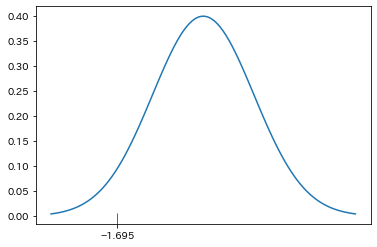

In [20]:
x = np.linspace(-3, 3, 100)
null_dist = stats.norm()
plt.plot(x, null_dist.pdf(x))
sns.rugplot([z])
plt.xticks([z])
plt.show()

---

Á∑¥ÁøíÂïèÈ°å

---
‰∏ä„ÅßÊ±Ç„ÇÅ„ÅüÊ§úÂÆöÁµ±Ë®àÈáè $z$ „Å´ÂØæÂøú„Åó„Åü $p$ ÂÄ§„ÇíÊ±Ç„ÇÅ„Çã„ÄÇ

Ëß£Á≠î‰æã

---

In [21]:
p = null_dist.sf(np.abs(z)) * 2
p

0.09007096940440563

---

## Python„Åß„ÅÆÂØæÂøú„ÅÆ„Å™„ÅÑ2Áæ§„ÅÆÊØîÁéá„ÅÆÂ∑Æ„ÅÆÊ§úÂÆö„ÅÆÂÆüË°åÊñπÊ≥ï
---
`statsmodels.stats.proportion.proportions_ztest`„Çí‰ΩøÁî®„Åô„Çã„ÄÇ

In [22]:
help(proportions_ztest)

Help on function proportions_ztest in module statsmodels.stats.proportion:

proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)
    Test for proportions based on normal (z) test
    
    Parameters
    ----------
    count : {int, array_like}
        the number of successes in nobs trials. If this is array_like, then
        the assumption is that this represents the number of successes for
        each independent sample
    nobs : {int, array_like}
        the number of trials or observations, with the same length as
        count.
    value : float, array_like or None, optional
        This is the value of the null hypothesis equal to the proportion in the
        case of a one sample test. In the case of a two-sample test, the
        null hypothesis is that prop[0] - prop[1] = value, where prop is the
        proportion in the two samples. If not provided value = 0 and the null
        is prop[0] = prop[1]
    alternative : str in ['two-sided', 'sma

In [23]:
proportions_ztest([tokyo.sum(), osaka.sum()], [tokyo.count(), osaka.count()])

(-1.6950234656435301, 0.09007096940440563)

## Êé®Ëñ¶Âõ≥Êõ∏
---
- [R„Å´„Çà„Çã„ÇÑ„Åï„Åó„ÅÑÁµ±Ë®àÂ≠¶](https://www.amazon.co.jp/R%E3%81%AB%E3%82%88%E3%82%8B%E3%82%84%E3%81%95%E3%81%97%E3%81%84%E7%B5%B1%E8%A8%88%E5%AD%A6-%E5%B1%B1%E7%94%B0-%E5%89%9B%E5%8F%B2/dp/4274067106/)
- [ÂøÉÁêÜÁµ±Ë®àÂ≠¶„ÅÆÂü∫Á§é‚ÄïÁµ±ÂêàÁöÑÁêÜËß£„ÅÆ„Åü„ÇÅ„Å´](https://www.amazon.co.jp/%E5%BF%83%E7%90%86%E7%B5%B1%E8%A8%88%E5%AD%A6%E3%81%AE%E5%9F%BA%E7%A4%8E%E2%80%95%E7%B5%B1%E5%90%88%E7%9A%84%E7%90%86%E8%A7%A3%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AB-%E6%9C%89%E6%96%90%E9%96%A3%E3%82%A2%E3%83%AB%E3%83%9E-%E5%8D%97%E9%A2%A8%E5%8E%9F-%E6%9C%9D%E5%92%8C/dp/4641121605/)